In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

## Lecture 9 ##

## Functions ##

In [2]:
def triple(x):
    return 3 * x

In [3]:
num = 4
triple(num * 5)

60

In [4]:
x


NameError: name 'x' is not defined

In [5]:
num

4

In [6]:
x=7
x

7

### Multiple Arguments

$ h^2 = x^2 + y^2 \hspace{20 pt} => \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $

In [8]:
def hypotenuse(x,y):
    hypot_squared = (x ** 2 + y ** 2)
    return hypot_squared ** 0.5

In [9]:
hypotenuse(3, 4)

5.0

In [10]:
hypotenuse(1, 1)

1.4142135623730951

In [11]:
x


7

In [12]:
y

NameError: name 'y' is not defined

### Discussion Question: Write a Function that Computes Age Based on Birth Year

In [13]:
def age(x):
    return 2021 -x

In [14]:
age(2000)

21

In [15]:
age(2021)

0

In [16]:
age(2002)

19

## Apply 

In [18]:
staff = Table().with_columns(
    'Person', make_array('Jim', 'Pam', 'Michael', 'Creed', 'Dwight'),
    'Birth Year', make_array(1985, 1988, 1967, 1904, 1975)
)
staff

Person,Birth Year
Jim,1985
Pam,1988
Michael,1967
Creed,1904
Dwight,1975


In [19]:
staff.apply(age, 'Birth Year')

array([ 36,  33,  54, 117,  46])

In [21]:
def name_and_age(name, year):
    age = 2021 - year
    return name + ' is ' + str(age) + ' years old.'

In [22]:
staff.apply(name_and_age, 'Person', 'Birth Year')

array(['Jim is 36 years old.', 'Pam is 33 years old.',
       'Michael is 54 years old.', 'Creed is 117 years old.',
       'Dwight is 46 years old.'], dtype='<U24')

## Prediction ##

In [23]:
families = Table.read_table('family_heights_v2.csv')
families

family,father,mother,children,childNum,sex,childHeight
1,78.5,67,4,1,male,73.2
1,78.5,67,4,2,female,69.2
1,78.5,67,4,3,female,69
1,78.5,67,4,4,female,69
2,75.5,66.5,4,1,male,73.5
2,75.5,66.5,4,2,male,72.5
2,75.5,66.5,4,3,female,65.5
2,75.5,66.5,4,4,female,65.5
3,75,64,2,1,male,71
3,75,64,2,2,female,68


# Discussion Question

## How to predict child's height based on information given?

In [26]:
parent_avgs = (families.column('father') + families.column('mother'))/2
#parent_avgs

In [27]:
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('childHeight'),
    'Sex', families.column('sex')
)
heights

Parent Average,Child,Sex
72.75,73.2,male
72.75,69.2,female
72.75,69,female
72.75,69,female
71,73.5,male
71,72.5,male
71,65.5,female
71,65.5,female
69.5,71,male
69.5,68,female


###  What type of graph to use to visualize the relationship between parents' average height and child's height?

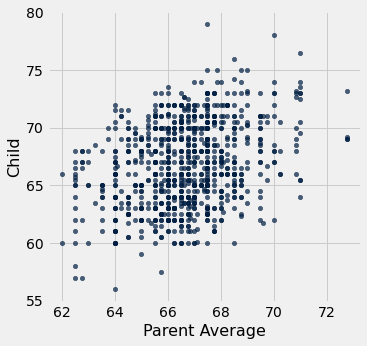

In [28]:
heights.scatter('Parent Average', 'Child')

## Given the parents' average height is 68, how to predict child's height?

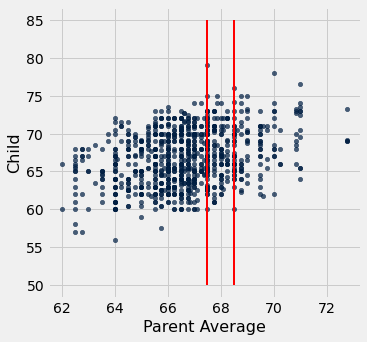

In [29]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [35]:
nearby = heights.where('Parent Average', are.between(67.5, 68.5))
#nearby

In [31]:
nearby_avg = np.average(nearby.column('Child'))
nearby_avg

67.62

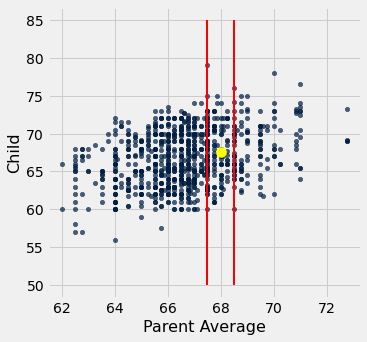

In [34]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_avg, color='yellow', s=100);

## Write a function to predict every child's height based on parents' average height

In [36]:
def predict(h):
    nearby = heights.where('Parent Average', are.between(h - 1/2, h + 1/2))
    return np.average(nearby.column('Child'))

In [37]:
predict(68)

67.62

In [38]:
predict(70)

68.56190476190476

In [39]:
predict(73)

70.1

In [40]:
predicted_heights = heights.apply(predict, 'Parent Average')
predicted_heights

array([70.1       , 70.1       , 70.1       , 70.1       , 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 68.5025    , 68.5025    ,
       68.5025    , 68.5025    , 68.5025    , 68.5025    , 68.5025    ,
       66.48230453, 66.48230453, 66.48230453, 66.48230453, 66.48230453,
       66.48230453, 70.41578947, 70.41578947, 70.41578947, 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 69.285     , 69.285     ,
       69.285     , 69.285     , 68.66052632, 67.62      , 67.62      ,
       67.62      , 67.62      , 67.62      , 67.62      , 67.62      ,
       67.62      , 67.46184211, 68.56190476, 68.56190476, 68.56190476,
       68.56190476, 68.66052632, 68.66052632, 68.66052632, 67.9880597 ,
       67.9880597 , 67.9880597 , 67.9880597 , 67.9880597 , 67.9880597 ,
       67.9880597 , 67.9880597 , 67.9880597 , 68.05465116, 68.05465116,
       68.05465116, 68.05465116, 68.05465116, 68.05465116, 67.53142857,
       67.53142857, 67.53142857, 67.7016    , 70.41578947, 70.41

In [42]:
heights = heights.with_column('Prediction', predicted_heights)
heights

Parent Average,Child,Sex,Prediction
72.75,73.2,male,70.1
72.75,69.2,female,70.1
72.75,69,female,70.1
72.75,69,female,70.1
71,73.5,male,70.4158
71,72.5,male,70.4158
71,65.5,female,70.4158
71,65.5,female,70.4158
69.5,71,male,68.5025
69.5,68,female,68.5025


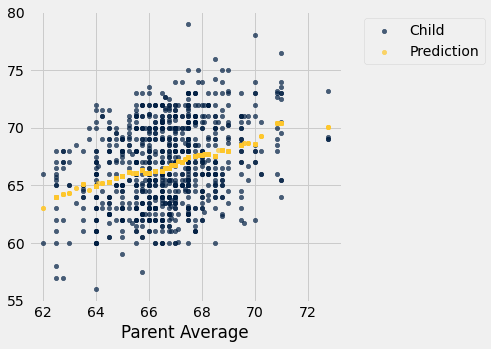

In [43]:
heights.select('Parent Average', 'Child', 'Prediction').scatter('Parent Average')

## Prediction Accuracy ##

In [44]:
def difference(x, y):
    return x - y

In [45]:
pred_errs = heights.apply(difference, 'Prediction', 'Child')
pred_errs

array([-3.10000000e+00,  9.00000000e-01,  1.10000000e+00,  1.10000000e+00,
       -3.08421053e+00, -2.08421053e+00,  4.91578947e+00,  4.91578947e+00,
       -2.49750000e+00,  5.02500000e-01, -1.99750000e+00,  2.50000000e-03,
        1.50250000e+00,  4.00250000e+00,  5.50250000e+00, -5.51769547e+00,
       -2.51769547e+00, -1.51769547e+00, -1.76954733e-02,  3.98230453e+00,
        3.98230453e+00,  9.15789474e-01, -6.08421053e+00, -3.58421053e+00,
       -2.58421053e+00, -2.58421053e+00, -8.42105263e-02,  6.41578947e+00,
       -1.21500000e+00,  1.28500000e+00,  3.28500000e+00,  3.28500000e+00,
        3.16052632e+00, -6.38000000e+00, -2.38000000e+00, -3.80000000e-01,
        6.20000000e-01,  6.20000000e-01,  1.62000000e+00,  4.12000000e+00,
        4.62000000e+00,  2.46184211e+00, -2.43809524e+00,  6.56190476e+00,
        5.61904762e-01,  1.56190476e+00, -2.33947368e+00, -1.83947368e+00,
        1.96052632e+00, -4.01194030e+00, -2.51194030e+00, -2.21194030e+00,
       -2.21194030e+00, -

In [46]:
heights.column('Prediction') - heights.column('Child')

array([-3.10000000e+00,  9.00000000e-01,  1.10000000e+00,  1.10000000e+00,
       -3.08421053e+00, -2.08421053e+00,  4.91578947e+00,  4.91578947e+00,
       -2.49750000e+00,  5.02500000e-01, -1.99750000e+00,  2.50000000e-03,
        1.50250000e+00,  4.00250000e+00,  5.50250000e+00, -5.51769547e+00,
       -2.51769547e+00, -1.51769547e+00, -1.76954733e-02,  3.98230453e+00,
        3.98230453e+00,  9.15789474e-01, -6.08421053e+00, -3.58421053e+00,
       -2.58421053e+00, -2.58421053e+00, -8.42105263e-02,  6.41578947e+00,
       -1.21500000e+00,  1.28500000e+00,  3.28500000e+00,  3.28500000e+00,
        3.16052632e+00, -6.38000000e+00, -2.38000000e+00, -3.80000000e-01,
        6.20000000e-01,  6.20000000e-01,  1.62000000e+00,  4.12000000e+00,
        4.62000000e+00,  2.46184211e+00, -2.43809524e+00,  6.56190476e+00,
        5.61904762e-01,  1.56190476e+00, -2.33947368e+00, -1.83947368e+00,
        1.96052632e+00, -4.01194030e+00, -2.51194030e+00, -2.21194030e+00,
       -2.21194030e+00, -

In [47]:
heights = heights.with_column('errors',pred_errs)
heights

Parent Average,Child,Sex,Prediction,errors
72.75,73.2,male,70.1,-3.1
72.75,69.2,female,70.1,0.9
72.75,69,female,70.1,1.1
72.75,69,female,70.1,1.1
71,73.5,male,70.4158,-3.08421
71,72.5,male,70.4158,-2.08421
71,65.5,female,70.4158,4.91579
71,65.5,female,70.4158,4.91579
69.5,71,male,68.5025,-2.4975
69.5,68,female,68.5025,0.5025


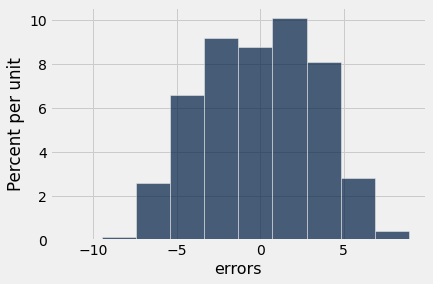

In [48]:
heights.hist('errors')

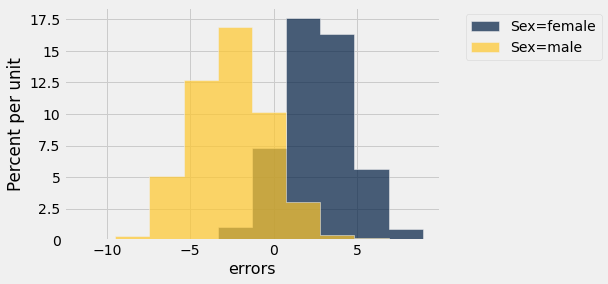

In [49]:
heights.hist('errors', group='Sex')

# Discussion Question

## How could we take gender into account when making predictions?

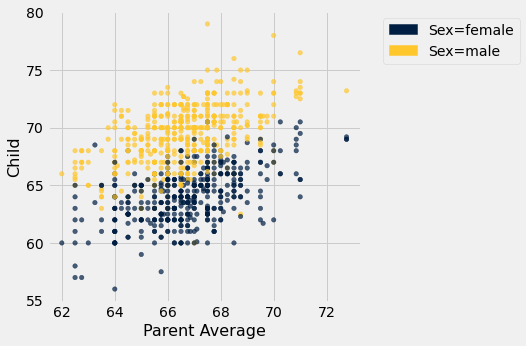

In [50]:
heights.select('Parent Average', 'Child', 'Sex').scatter('Parent Average', group='Sex')

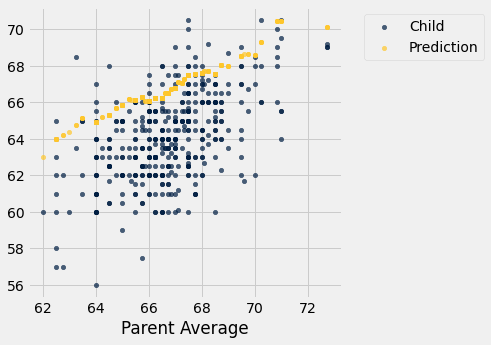

In [51]:
heights.where('Sex', 'female').select('Parent Average', 'Child', 'Prediction').scatter('Parent Average')

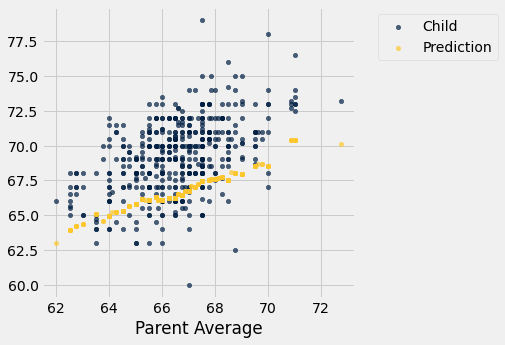

In [52]:
heights.where('Sex', 'male').select('Parent Average', 'Child', 'Prediction').scatter('Parent Average')

In [ ]:
def predict(h):
    nearby = heights.where('Parent Average', are.between(h - 1/2, h + 1/2))
    return np.average(nearby.column('Child'))

In [53]:
def predict_smarter(h, g):
    nearby = heights.where('Parent Average', are.between(h - 1/2, h + 1/2))
    nearby_same_sex = nearby.where('Sex', g)
    return np.average(nearby_same_sex.column('Child'))

In [54]:
predict_smarter(68, 'female')

64.98351648351648

In [55]:
predict_smarter(68, 'male')

70.17234042553191

In [56]:
smarter_predicted_heights = heights.apply(predict_smarter, 'Parent Average', 'Sex')
heights = heights.with_column('Smarter Prediction', smarter_predicted_heights)
heights

Parent Average,Child,Sex,Prediction,errors,Smarter Prediction
72.75,73.2,male,70.1,-3.1,73.2
72.75,69.2,female,70.1,0.9,69.0667
72.75,69,female,70.1,1.1,69.0667
72.75,69,female,70.1,1.1,69.0667
71,73.5,male,70.4158,-3.08421,73.4889
71,72.5,male,70.4158,-2.08421,73.4889
71,65.5,female,70.4158,4.91579,67.65
71,65.5,female,70.4158,4.91579,67.65
69.5,71,male,68.5025,-2.4975,70.7955
69.5,68,female,68.5025,0.5025,65.7


In [57]:
smarter_pred_errs = heights.apply(difference, 'Child', 'Smarter Prediction')
heights = heights.with_column('Smarter Errors', smarter_pred_errs)
heights

Parent Average,Child,Sex,Prediction,errors,Smarter Prediction,Smarter Errors
72.75,73.2,male,70.1,-3.1,73.2,0
72.75,69.2,female,70.1,0.9,69.0667,0.133333
72.75,69,female,70.1,1.1,69.0667,-0.0666667
72.75,69,female,70.1,1.1,69.0667,-0.0666667
71,73.5,male,70.4158,-3.08421,73.4889,0.0111111
71,72.5,male,70.4158,-2.08421,73.4889,-0.988889
71,65.5,female,70.4158,4.91579,67.65,-2.15
71,65.5,female,70.4158,4.91579,67.65,-2.15
69.5,71,male,68.5025,-2.4975,70.7955,0.204545
69.5,68,female,68.5025,0.5025,65.7,2.3


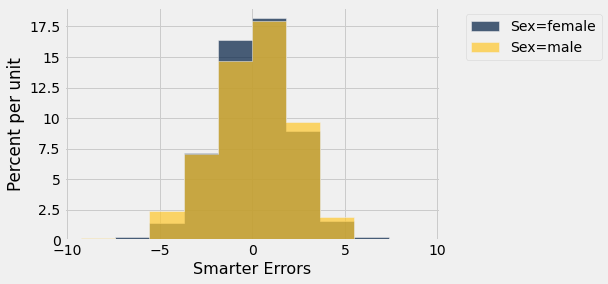

In [58]:
heights.hist('Smarter Errors', group='Sex')